In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

/home/main/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# 1 punto

In [3]:
#Funciones necesarias
#Nota: Angulos en radianes y se usa el S.I

#Tiempo a partir del angulo en radianes
def T(Angulo):
    tiempo = 3.0/(500.0*np.pi)*Angulo
    return tiempo

#Posicion:
def X(t,R=0.09):
    Teta = 500*np.pi/3.0 # Velocidad angular en rad/seg
    Pos = ( np.cos(Teta*t) + ( 2.5**2 - np.sin(Teta*t)**2 )**0.5 )*R
    return Pos

#Derivadas

#Derivada de 2 orden para puntos medios
def der_2_medio(y,i,h):
    return ( y[i+1] + y[i-1] - 2*y[i] )/h**2.0

#Derivada de 2 orden para puntos extremos
def der_2_ext(y,i,h):
    return ( y[i+2] - 2*y[i+1] + y[i] )/h**2.0

In [4]:
#Listas

#Angulos desde 0 hasta 360 grados (un ciclo completo) (en radianes)
Os = []                         
for i in xrange(0,73):
    Rad = np.pi/180.0 #En radianes
    Os.append(5*Rad*i)
Tetas = np.array(Os)

#Tiempos y h
Ts = T(Tetas)
h = abs(Ts[1]-Ts[0])

#Posiciones para cada tiempo
Ps = X(Ts)
#print len(Tetas),len(Ts),len(Ps)

In [5]:
#Calculo de la aceleracion

A = []
A.append(der_2_ext(Ps,0,h)) # Aceleracion inicial

for i in xrange(1,len(Ts)-1):
    Acel = der_2_medio(Ps,i,h)
    A.append(Acel)
#print "Las aceleraciones para cada tiempo son: ", A

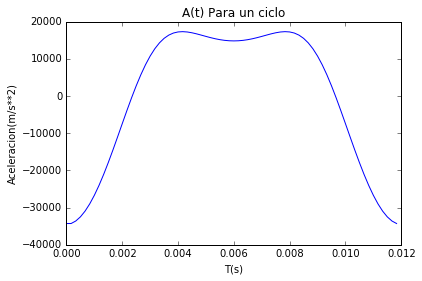

In [6]:
#Grafico
plt.plot(Ts[:len(Ts)-1],A)
plt.title('A(t) Para un ciclo')
plt.xlabel('T(s)')
plt.ylabel('Aceleracion(m/s**2)')

In [7]:
"""
Vemos entonces que durante medio ciclo la aceleracion aumenta hasta un valor y baja un poco pero luego repite
este comportamiento para el otro medio ciclo pero con signo (sentido) contrario
"""

'\nVemos entonces que durante medio ciclo la aceleracion aumenta hasta un valor y baja un poco pero luego repite\neste comportamiento para el otro medio ciclo pero con signo (sentido) contrario\n'

In [8]:
# 2 Punto

In [140]:
#Matrix del sistema de ecuaciones y vector b (Ax=b)
def Matrix(R,r):
    M = np.matrix([[ 1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0],
                   [-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0],
                   [0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,1.0],
                   [-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0],
                   [0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0],
                   [0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0],
                   [0.0,0.0,r/R,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0],
                   [-1.0,-1.0,r/R,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                   [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0]])
    return M

b = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1])

In [155]:
#Matrices para varios r
R = 1.0
V = 1.0
r = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

A = []
S = []
x_13 = []
I_13 = []
R_eq = []

#Aderiendo matrices A_i para cada r a el vector de matrices A
for i in xrange(0,len(r)):
    A_i = Matrix(R,r[i])
    A_i = np.matrix(A_i)
    A.append(A_i)

#Soluciones
for i in xrange(len(A)):
    S_i = b.dot(A[i].I)
    S.append(S_i)

#Tomando la solucion para x_13 y convirtiendola en la respectiva I_13
for i in xrange(len(S)):
    XS = S[i][0,12]
    IS = XS*V/R
    x_13.append(XS)
    I_13.append(IS)
    R_eq.append(V/IS)